In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from difflib import get_close_matches
from IPython.display import display
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

## Preprocessing & data cleaning

**steps include:**
- renaming dataset columns to snake_case and english
- checking for missing values
- checking for potential outliers
- adding column country 
- validating text data
- converting date to integer

In [2]:
df = pd.read_csv("fotbal_prestupy_2000_2019.csv", encoding='utf-8')

In [3]:
df.head()

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [4]:
df.rename(columns={"Jméno": "name", 
                   "Pozice": "position", 
                   "Věk": "age", 
                   "Původní tým": "original_team", 
                   "Původní liga": "original_league",
                   "Nový tým": "new_team",
                   "Nová  Liga": "new_league",
                   "Sezóna": "season",
                   "Odhadovaná hodnota": "estimated_value",
                   "Přestupová částka": "transfer_fee"}, inplace=True)
df.head()

,name,position,age,original_team,original_league,new_team,new_league,season,estimated_value,transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


### Validating text columns 
First I want to check all the text columns and try to find possible typos which could lead to duplicities. For this I will use difflib function get_close_matches, which will be able to return similar enough cases and should cover typos and mistranslations. 

In [5]:
text_cols = ["name", "position", "original_team", "original_league", "new_team", "new_league"]

def preprocess_text(column):
    column = column.str.strip() # strip trailing spaces 
    column = column.str.replace("-"," ") # replace - with space
    column = column.str.replace("\n","") # remove newlines
    column = column.str.replace("\t","") # remove tabs
    column = column.str.lower() # all lowercase
    return column

In [6]:
for col in text_cols:
    df[col] = preprocess_text(df[col])

In [7]:
def get_similar_entities(unique_names):
    matches= []
    for i, name in enumerate(list(unique_names)):
        possible_match = get_close_matches(name, list(unique_names[i+1:]), cutoff=0.7)
        if possible_match:
            matches.append((name, possible_match))
    return matches

In [8]:
for col in ["team", "league"]:
    display(f"Similarities for {col}s:")
    display(get_similar_entities(pd.concat([df[f"original_{col}"], df[f"new_{col}"]]).unique()))

'Similarities for teams:'

[('fc barcelona', ['fc barcelona b', 'barcelona sc', 'fc basel']),
 ('parma', ['paraná']),
 ('arsenal', ['arsenal fc', 'arsenal u23', 'arsenal u18']),
 ('real madrid', ['real murcia']),
 ('west ham', ['west brom']),
 ('monaco', ['monza']),
 ('valencia cf', ['valencia b']),
 ('atlético madrid', ['atlético pr', 'atlético mg']),
 ('atlético pr', ['atlético mg']),
 ('chelsea', ['chelsea u23']),
 ('inter', ['inter u19']),
 ('benfica', ['benfica b', 'benfica u19']),
 ('sparta praha', ['sparta r.']),
 ('partizan', ['paraná']),
 ('sporting cp', ['sporting gijón']),
 ('são paulo', ['fc são paulo b']),
 ('racing', ['reading', 'racing club']),
 ('lens', ['león', 'le mans']),
 ('mk dons', ['mk dons u18']),
 ('internacional', ['nacional', 'ternana']),
 ('dinamo zagreb', ['nk zagreb', 'dinamo bukarest']),
 ('olympiacos', ['olimpia']),
 ('bolton', ['bologna']),
 ('juventus', ['juventude']),
 ('rangers', ['sco angers']),
 ('nacional', ['atl. nacional']),
 ('loko moscow', ['cska moscow', 'torpedo mosco

'Similarities for leagues:'

[('laliga', ['laliga2']),
 ('serie a', ['série a', 'serie b', 'serie c   a']),
 ('premier league', ['u18 premier league', 'super league', 'premier liga']),
 ('ligue 1', ['ligue 2', 'liga 1', 'rel. ligue 1']),
 ('serie b', ['série b', 'serie c   b', 'série a']),
 ('1.bundesliga', ['2.bundesliga', 'bundesliga']),
 ('liga nos', ['liga 1']),
 ('eredivisie', ['u19 eredivisie']),
 ('england', ['finland']),
 ('süper lig', ['superliga', 'superligaen']),
 ('croatia', ['romania']),
 ('super league',
  ['stars league', 'u18 premier league', 'jupiler pro league']),
 ('2.bundesliga', ['bundesliga']),
 ('1.lig', ['3.liga']),
 ('k league 1', ['j2 league', 'j1 league', 'league one']),
 ('serie c   a', ['serie c   b']),
 ('série a', ['série b']),
 ('superligaen', ['superliga']),
 ('j1 league', ['j2 league']),
 ('torneo final', ['torneo inicial']),
 ('2ª b   grupo iii', ['2ª b   grupo i']),
 ('liga mx clausura', ['liga mx apertura']),
 ('liga 1   championship group',
  ['a grupa   championship gr.', 'su

### Text cols revision results:
**Revision of close matches found out several mistakes:**
FC Arsenal was in several instances named just Arsenal
Al Shabab was in several instances named just Shabab
Al Nasr was in several instances named just Nasr

In [9]:
df.loc[df["original_team"] == "arsenal", "original_team"] = "arsenal fc"
df.loc[df["new_team"] == "arsenal", "new_team"] = "arsenal fc"

df.loc[df["original_team"] == "shabab", "original_team"] = "al shabab"
df.loc[df["new_team"] == "shabab", "original_team"] = "al shabab"

df.loc[df["original_team"] == "nasr", "original_team"] = "al nasr"
df.loc[df["new_team"] == "nasr", "new_team"] = "al nasr"

## Validating other columns 
looking into season, age, estimated_value and transfer_fee columns

In [10]:
df["season"] = df["season"].str.split("-", expand=True)[0] # take the starting year of season
df["season"] = df["season"].astype(int)

### Check validity of ages 

In [11]:
df["age"].sort_values(ascending=True) # There is one player who is 0 years old

236      0
1370    15
945     16
4502    16
1306    16
        ..
439     34
112     35
2954    35
487     35
2414    35
Name: age, Length: 4700, dtype: int64

There is one player with age 0. Assuming his parents did not sell his soul to a Saudi Arabian football club, I will impute this value with information available online. If there were more cases than just 1 and imputing with real data was too time consuming or impossible, I would use mean or median imputation. 

From his wikipedia page, I can see that he was 25 years old during his transfer from al shabab to ittihad

In [12]:
df[df["age"] == 0]

,name,position,age,original_team,original_league,new_team,new_league,season,estimated_value,transfer_fee
236,marzouq al otaibi,centre forward,0,al shabab,saudi arabia,ittihad,saudi arabia,2000,NaN,2000000


In [13]:
df.loc[df["age"] == 0, "age"] = 25

In [14]:
df["age"].isna().sum() 

0

### Check validity of season
The number and values of seasons matches. No validation to go through here.

In [15]:
df["season"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

### Check validity of transfer_fee


In [16]:
df["transfer_fee"].isna().sum() # no missing values

0

In [17]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,age,season,estimated_value,transfer_fee
count,4700.00,4700.00,3440.00,4700.00
mean,24.34,2009.00,8622469.48,9447586.17
std,3.21,5.47,8795180.75,10437719.32
min,15.00,2000.00,50000.00,825000.00
25%,22.00,2004.00,3500000.00,4000000.00
50%,24.00,2009.00,6000000.00,6500000.00
75%,27.00,2014.00,10000000.00,10820000.00
max,35.00,2018.00,120000000.00,222000000.00


### Check validity of estimated_value

In [18]:
df[df.isna().any(axis=1)] #1260 missing values -> all of them are in estimated_value 

,name,position,age,original_team,original_league,new_team,new_league,season,estimated_value,transfer_fee
0,luís figo,right winger,27,fc barcelona,laliga,real madrid,laliga,2000,NaN,60000000
1,hernán crespo,centre forward,25,parma,serie a,lazio,serie a,2000,NaN,56810000
2,marc overmars,left winger,27,arsenal fc,premier league,fc barcelona,laliga,2000,NaN,40000000
3,gabriel batistuta,centre forward,31,fiorentina,serie a,as roma,serie a,2000,NaN,36150000
4,nicolas anelka,centre forward,21,real madrid,laliga,paris sg,ligue 1,2000,NaN,34500000
...,...,...,...,...,...,...,...,...,...,...
4355,douglas luiz,central midfield,19,vasco da gama,série a,man city,premier league,2017,NaN,12000000
4427,jadon sancho,left winger,17,man city u18,u18 premier league,bor. dortmund,1.bundesliga,2017,NaN,7840000
4618,davide bettella,centre back,18,inter,serie a,atalanta,serie a,2018,NaN,7000000
4648,william bianda,centre back,18,lens,ligue 2,as roma,serie a,2018,NaN,6000000


There are missing values across all the years except 2015. 
Most of  them in 2000, 2001, 2002, 2003, 2004.

Possible solutions: 
   - Dropping the values
   - mean/median imputation 
   - regression imputation

In [19]:
df[df.isna().any(axis=1)]["season"].value_counts() 

season
2001    250
2000    248
2002    244
2003    242
2004    189
2005     28
2006     20
2007     13
2008      7
2010      4
2017      3
2018      3
2012      2
2013      2
2009      2
2014      1
2016      1
2011      1
Name: count, dtype: int64

In [20]:
def get_outliers(df, column_name):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the boxplot
    boxplot = ax.boxplot(df[column_name], vert=False, patch_artist=True)

    # Highlight outliers
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify and highlight outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Change the color of the box to distinguish it from the outliers
    for patch in boxplot['boxes']:
        patch.set_facecolor('lightblue')

    # Add the scatter plot for outliers
    ax.scatter(outliers[column_name], [1] * len(outliers), color='red', label='Outliers')

    # Set labels and title
    ax.set_yticklabels([column_name])
    ax.set_xlabel('Values')
    ax.set_title(f'Boxplot for {column_name} with Outliers')

    # Show legend
    ax.legend()

    # Disable scientific notation on the x-axis
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))

    # Show the plot
    plt.show()

    # Return the outliers DataFrame
    return outliers

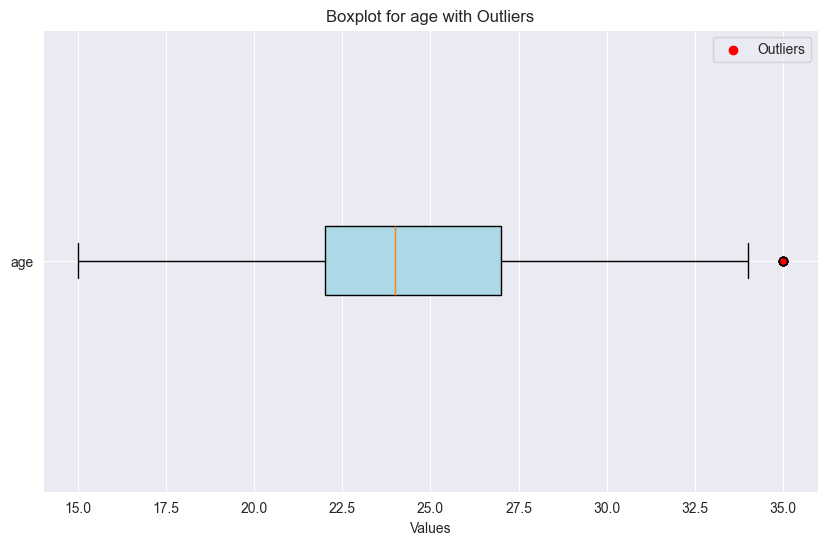

,name,position,age,original_team,original_league,new_team,new_league,season,estimated_value,transfer_fee
112,josé luis chilavert,goalkeeper,35,vélez sarsfield,argentina,r. strasbourg,ligue 1,2000,NaN,5300000
487,claudio taffarel,goalkeeper,35,galatasaray,süper lig,parma,serie a,2001,NaN,2000000
2414,zé roberto,left midfield,35,nacional,primera división,hamburger sv,1.bundesliga,2009,5000000.0,4000000
2954,shay given,goalkeeper,35,man city,premier league,aston villa,premier league,2011,5500000.0,3750000


In [21]:
get_outliers(df, "age")

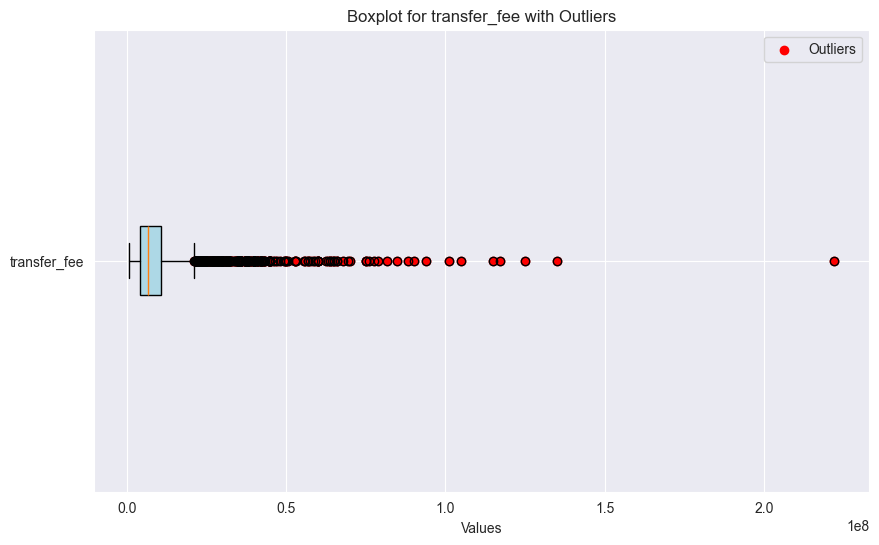

,name,position,age,original_team,original_league,new_team,new_league,season,estimated_value,transfer_fee
0,luís figo,right winger,27,fc barcelona,laliga,real madrid,laliga,2000,NaN,60000000
1,hernán crespo,centre forward,25,parma,serie a,lazio,serie a,2000,NaN,56810000
2,marc overmars,left winger,27,arsenal fc,premier league,fc barcelona,laliga,2000,NaN,40000000
3,gabriel batistuta,centre forward,31,fiorentina,serie a,as roma,serie a,2000,NaN,36150000
4,nicolas anelka,centre forward,21,real madrid,laliga,paris sg,ligue 1,2000,NaN,34500000
...,...,...,...,...,...,...,...,...,...,...
4487,yuri berchiche,left back,28,paris sg,ligue 1,athletic bilbao,laliga,2018,17000000.0,24000000
4488,alassane pléa,centre forward,25,ogc nice,ligue 1,bor. m'gladbach,1.bundesliga,2018,18000000.0,23000000
4489,ricardo pereira,right back,24,fc porto,liga nos,leicester,premier league,2018,20000000.0,22000000
4490,diogo dalot,right back,19,fc porto,liga nos,man utd,premier league,2018,15000000.0,22000000


In [22]:
get_outliers(df, "transfer_fee")

### Deriving feature country
**While league and team may be useful identificators of the background, it may not always be clear where the team is from as we have 615 unique teams. I decided to engineer a features "origin_country" and "target_country", that will represent the countries of the original and target teams, respectively.**

**For this I decided to use GPT 3.5 from OpenAI with the prompt:**
*"You will be presented with a list of football teams. I want you to assign the country of origin to them. Provide me with an output in the form of a python dictionary. E.g. {"Chelsea": "England", "Bayern": "Germany"}. If you are not sure what country the team is from, type "unknown"."*


**Outputs from the language model were saved into *countries.json* file.** 

In [23]:
pd.concat([df["original_team"], df["new_team"]]).unique()  # output from this list was used in the prompt to generate the feature country

array(['fc barcelona', 'parma', 'arsenal fc', 'fiorentina', 'real madrid',
       'west ham', 'dep. la coruña', 'real zaragoza', 'monaco',
       'valencia cf', 'atlético madrid', 'atlético pr', 'river plate',
       'boca juniors', 'stade rennais', 'coventry city',
       'cagliari calcio', 'bay. leverkusen', 'chelsea', 'dynamo kyiv',
       'inter', 'rcd mallorca', 'g. bordeaux', 'fc porto', 'benfica',
       'lazio', 'real betis', 'everton', 'sparta praha', 'málaga cf',
       'partizan', 'celta de vigo', 'sporting cp', 'aston villa',
       'afc ajax', 'são paulo', 'marseille', 'racing', 'lens', 'mk dons',
       'cd tenerife', 'norwich', 'celtic', 'fenerbahce', 'middlesbrough',
       'internacional', 'leicester', 'rosenborg bk', 'dinamo zagreb',
       'feyenoord', 'grasshoppers', 'olympiacos', 'bolton', 'reggina',
       'juventus', 'fluminense', 'lecce', 'liverpool', 'cd cruz azul',
       'u. de chile', 'ponte preta', 'vitesse', 'galatasaray',
       'montpellier', 'roda jc', 

In [24]:
with open("countries.json", "r", encoding="utf-8") as f:
    countries = json.load(f)

In [25]:
df_countries = pd.DataFrame.from_dict(countries.items())
df_countries.columns =["team", "country"]
df_countries["team"] = preprocess_text(df_countries["team"])
df_countries["country"] = preprocess_text(df_countries["country"])

In [26]:
df = pd.merge(df, df_countries, left_on=['new_team'], right_on=['team'], how='left')
df = pd.merge(df, df_countries, left_on=['original_team'], right_on=['team'], how='left', suffixes=('_new', '_original'))
df.drop(['team_new', 'team_original'], axis=1, inplace=True)
df.rename(columns={'country_new': 'new_country', 'country_original': 'original_country'}, inplace=True)
